## Esercitazione 6 - 26 Marzo 2024

Scrivere le funzioni python `bisezione.py`, `falsi.py`, `corde.py`, `secanti.py`,`newton.py` che implementino rispettivamente il metodo di bisezione, di falsa posizione, delle corde, delle secanti e di Newton.

Le funzioni `bisezione.py`, `falsi.py` devono assumere come input:

-  gli estremi dell'intervallo [a,b], dominio di f.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tol: tolleranza per il test di arresto.
    Nel caso del metodo di bisezione e di falsa posizione si considera per il test di arresto l’ampiezza del sottointervallo confrontata con tolx.
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

La funzione `corde.py` deve assumere come input:

-  l'iterato iniziale x_0.
-  il coefficiente angolare comune a tutte le rette
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:          
               |x_k+1-x_k|/|x_k+1|<= tolx
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk
La funzione `newton.py` deve assumere come input:

-  l'iterato iniziale x_0.
-  il nome `fname` della funzione di cui calcolare lo zero
-  il nome `fpname` della derivata prima della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:          
               |x_k+1-x_k|/|x_k+1|<= tols
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

La funzione `secanti.py` deve assumere come input:

-  due iterati iniziali x_1, x_0.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:         
               |x_k+1-x_k|/|x_k+1|<= tolx
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

In [106]:
import numpy as np 
import matplotlib.pyplot as plt
import sympy as sys
import math 

In [107]:
def sign(x):
    return math.copysign(1,x)

In [108]:
def bisezione(a,b,fname, tol):
    fa = fname(a)
    fb = fname(b)

    if sign(fa)*sign(fb)>=0:
        print("metodo non applicabile")
        return None, None,None

    xk = []
    it = 0

    maxit=math.ceil(math.log2((b-a)/tol))-1

    while abs(b-a)>tol and it<maxit:
        x=a+(b-a)/2
        xk.append(x)
        fx = fname(x)
        it+=1

        if fx==0:
            return xk, it, x

        if sign(fa)*sign(fx)>0: #[x,b]
            a=x
            fa=fx 
        elif sign(fb)*sign(fx)>0: #[a,x]
            b=x
            fb=fx
               
              
    return xk, it, x

In [109]:
def falsi(a,b,fname,tolx,tolf,maxit):
    fa=fname(a)
    fb=fname(b)
    xk=[]
    it=0
    if sign(a)*sign(b)>=0:
        print("metodo non applicabile")
        return None,None,None

    fx=10

    while abs(b-a)>tolx and it<maxit and abs(fx)>tolf:
        x=a-fa*(b-a)/(fb-fa)
        xk.append(x)
        fx=fname(x)
        it+=1

        if fx==0: 
            return xk,it,x
        
        if sign(fa)*sign(fx)>0:
            a=x
            fa=fx
        elif sign(fb)*sign(fx)>0:
            b=x
            fb=fx
            
        
    return xk,it,x

In [110]:
def corde(x0,m,fname,tolx,tolf,maxit):
    xk=[]
    fx0=fname(x0)
    d=fx0/m
    x1=x0-d
    xk.append(x1)
    fx1=fname(x1)
    it=1

    while it<maxit and abs(d)/abs(x1)>=tolx and abs(fx1)>=tolf:
        x0=x1
        fx0=fname(x0)
        d=fx0/m
        x1=x0-d
        xk.append(x1)
        fx1=fname(x1)
        it+=1

    return xk, it, x1

In [111]:
def secanti(x1, x0, fname, tolx, tolf, maxit):
    fx1=fname(x1)
    fx0=fname(x0)
    m=(fx1-fx0)/(x1-x0)
    d=fx1/m
    x2=x1-d
    fx2=fname(x2)
    xk=[]
    xk.append(x2)
    it=1

    while it<maxit and abs(d)/abs(x2)>=tolx and abs(fx2)>=tolf:
        x0=x1
        x1=x2
        fx1=fname(x1)
        fx0=fname(x0)
        m=(fx1-fx0)/(x1-x0)
        d=fx1/m
        x2=x1-d
        fx2=fname(x2)
        xk.append(x2)
        it+=1

    return xk,it,x2


In [112]:
def newton(x0, fname, fpname, tolx, tolf, maxit):
    fx0=fname(x0)

    if abs(fpname(x0))<=np.spacing(1):
        print("derivata prima nulla")
        return None,None,None
    
    d=fx0/fpname(x0)
    x1=x0-d
    fx1=fname(x1)
    xk=[]
    xk.append(x1)
    it=1

    while it<maxit and abs(d)>=tolx*abs(x1) and abs(fx1)>=tolf:
        x0=x1
        fx0=fname(x0)
        fd=fpname(x0)

        if abs(fpname(x0))<=np.spacing(1):
            print("derivata prima nulla")
            return None,None,None
    
        d=fx0/fpname(x0)
        x1=x0-d
        fx1=fname(x1)
        xk.append(x1)
        it+=1

    return xk,it,x1



In [113]:
def ordine_convergenza(xk, it):
    k=it-4
    p=np.log(abs(xk[k+2]-xk[k+3])/abs(xk[k+1]-xk[k+2]))/np.log(abs(xk[k+1]-xk[k+2])/abs(xk[k]-xk[k+1]))
    return p

**Sperimentazione numerica**

 Confrontare i metodi sopra implementati nei casi seguenti:

- f(x) = exp(−x) − (x + 1) in [−1, 2] con x0 = −0.5, x−1 = −0.3, tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2] con x0 = −0.5, x−1 = 0.5, tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3] con x0 = 1.8, x−1 = 1.5, tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei
tre casi.
Calcolare infine, a partire dai valori di {xk} con k sufficientemente grande, la stima dell’ordine di convergenza p come

p= ln (|x_{k+1}-x_k|/|x_k-x_{k-1}|)/ln (|x_k-x_{k-1}|/|x_{k-1}-x_{k-2}|)

radice metodo bisezione 4.547473508864641e-13
radice metodo falsi 3.2573943542502093e-13
radice metodo corde 2.2214437069136664e-13
radice metodo secanti 4.3570715835022586e-17
radice metodo newton 3.827482567520148e-17
Ordine convergenza bisezione 1.0
Ordine convergenza falsi 0.9999541978181673
Ordine convergenza corde 1.0000008781223035
Ordine convergenza secanti 1.6932950831405307
Ordine convergenza Newton 2.0030279229690002


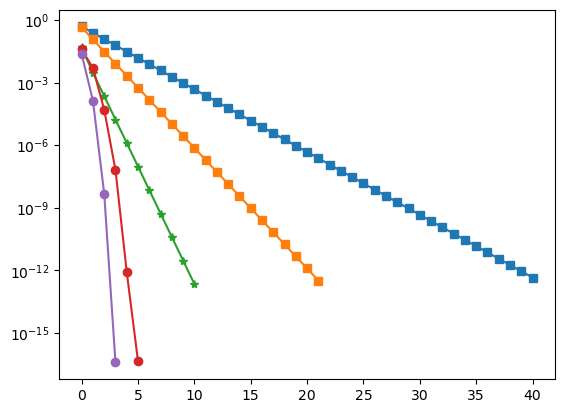

In [114]:
from sympy.utilities.lambdify import lambdify
x=sys.symbols('x')
fs=sys.exp(-x)-(x+1)
dfs=sys.diff(fs,x,1)
f1=lambdify(x,fs,np)
df1=lambdify(x,dfs, np)

a=-1
b=2
x1=-0.5
x0=-0.3
tolx = 1e-12
tolf = 1e-12
maxit=1000

alpha=0

xk_b, it_b, x_b = bisezione(a, b, f1, tolx)
print("radice metodo bisezione", x_b)
xk_f, it_f, x_f = falsi(a, b, f1, tolx, tolf, maxit)
print("radice metodo falsi", x_f)
m=(f1(b)-f1(a))/(b-a)
xk_c, it_c, x_c = corde(x0, m, f1, tolx, tolf, maxit)
print("radice metodo corde", x_c)
xk_s, it_s, x_s = secanti(x1,x0, f1, tolx, tolf, maxit)
print("radice metodo secanti", x_s)
xk_n, it_n, x_n = newton(x0,f1,df1, tolx, tolf, maxit)
print("radice metodo newton", x_n)

xk_b = np.array(xk_b)
p_b = ordine_convergenza(xk_b, it_b)
print("Ordine convergenza bisezione", p_b)
xk_f = np.array(xk_f)
p_f = ordine_convergenza(xk_f, it_f)
print("Ordine convergenza falsi", p_f)
xk_c = np.array(xk_c)
p_c = ordine_convergenza(xk_c, it_c)
print("Ordine convergenza corde", p_c)
xk_s = np.array(xk_s)
p_s = ordine_convergenza(xk_s, it_s)
print("Ordine convergenza secanti", p_s)
xk_n = np.array(xk_n)
p_n = ordine_convergenza(xk_n, it_n)
print("Ordine convergenza Newton", p_n)

ek_b=abs(xk_b-alpha)
ek_f=abs(xk_f-alpha)
ek_c=abs(xk_c-alpha)
ek_s=abs(xk_s-alpha)
ek_n=abs(xk_n-alpha)

plt.semilogy(range(it_b), ek_b, 's-',range(it_f), ek_f, 's-',range(it_c), ek_c, '*-',range(it_s), ek_s, 'o-',range(it_n), ek_n, 'o-' )

- Utilizzare il metodo di Newton e il metodo di Newton modificato per il calcolo
dello zero di molteplicita' 2 della funzione f(x) = 
x^3 + x^2− 33x + 63 con x0 = 1,
tolx = 1.e − 12 e tolf = 1.e − 12. Calcolare infine, a partire dai valori di {xk}
ottenuti nei due casi, la stima dell’ordine di convergenza p.

In [115]:
def newton_mod(fname,fpname,m,x0,tolx,tolf,nmax):
    fx0=fname(x0)
    if np.abs(fpname(x0))<np.spacing(1):
        print("derivata prima nulla")
        return None, None, None
    d=fx0/fpname(x0)
    x1=x0-d*m
    fx1=fname(x1)
    xk=[]
    xk.append(x1)
    it=1

    while it<nmax and np.abs(d)>tolx*np.abs(x1) and np.abs(fx1)>tolf:
        x0=x1
        fx0=fname(x0)
        if np.abs(fx0)<np.spacing(1):
            print("derivata prima nulla")
            return None, None, None
        d=fx0/fpname(x0)
        x1=x0-d*m
        fx1=fname(x1)
        xk.append(x1)
        it+=1

    return xk,it,x1

In [116]:
fp = lambda x: x**3+x**2-33*x+63
dfp = lambda x: 3*x**2+2*x-33

x0 = 1.0
tolx = 1e-12
tolf = 1e-12
maxit=1000
m=2

xk_n, it_n, x_n = newton(x0,fp,dfp,tolx,tolf,maxit)
xk_nm, it_nm, x_nm = newton_mod(fp,dfp,m,x0,tolx,tolf,maxit)
xk_n = np.array(xk_n)
xk_nm=np.array(xk_nm)

p_n = ordine_convergenza(xk_n, it_n)
p_nm = ordine_convergenza(xk_nm, it_nm)
print("Ordine di convergenza metodo Newton", p_n)
print("Ordine di convergenza metodo Newton modificato", p_nm)


Ordine di convergenza metodo Newton 1.0008987815015167
Ordine di convergenza metodo Newton modificato 1.9965427710643453


- Utilizzare il metodo di bisezione ed il metodo di Newton per calcolare la radice quadrata di 2. Analizzate i risultati.

zero approssimato metodo bisezione 1.4142135623715149
zero approssimato metodo Newton 1.4142135623730951
numero di iterazioni 39
numero iterazioni Newton 5


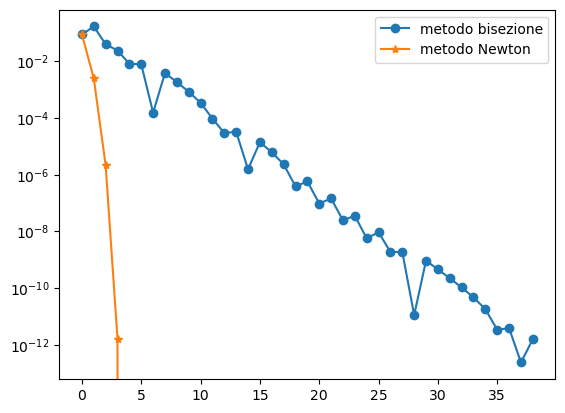

In [117]:
f = lambda x: x**2-2
df = lambda x: 2*x
# per il teorema degli zeri f(a)*f(b)<0 (=a e b discordi) -> f(1)=-1 f(2)=2
a=1 
b=2
# il metodo di newton dipende dalla scelta dell'interto iniziale x0, se scelto abbastanza vicino dalla soluzione allora il metodo converge
x0=1
tolx=1e-12
tolf=1e-12
maxit=1000

xk_b, it_b, x_b = bisezione(a,b,f,tolx)
xk_n, it_n, x_n = newton(x0,f,df,tolx,tolf,maxit)
print("zero approssimato metodo bisezione", x_b)
print("zero approssimato metodo Newton", x_n)

alpha=np.sqrt(2)
ek_b=np.abs(np.array(xk_b)-alpha)
ek_n=np.abs(np.array(xk_n)-alpha)

print("numero di iterazioni", it_b)
print("numero iterazioni Newton", it_n)

plt.semilogy(range(it_b),ek_b,'-o',range(it_n),ek_n,'-*')
plt.legend(['metodo bisezione','metodo Newton'])

Si osserva che il metodo di newton sia molto più veloce nel trovare la radice della funzione, tuttavia presenta dei limiti, ad esempio dipende dalla scelta dell'iterato iniziale, infatti se provo con un x0=1.5 il metodo converge con un ek=0.0 mentre se scelto x0=3, ek = 1.6653..
Il metodo della bisezione invece converge globalmente, ma richiede un numero maggiore di iterazioni

- Utilizzare il metodo di Newton per determinare le radici dell’equazione f (x) = 
rcatan(x) con x0 = 1.2, 1.4 assumendo tolx = 1.e − 6 e tolf = 1.e − 5. Che cos a
si osserva?

In [118]:
f = lambda x: np.arctan(x)
df = lambda x: 1/(1+x**2)

x0=1.2
tolx=1e-6
tolf=1e-5
maxit=1000

xk_n, it_n, x_n = newton(x0,f,df,tolx,tolf,maxit)
print("radice equazione", x_n)

radice equazione -7.599003837201884e-12


**Soluzione di sistemi non lineari**


- Scrivere la function `NewtonRaphson.py`, che implementa il metodo di Newton-Raphson
per il calcolo della soluzione di un sistema di equazioni non lineari. 

    Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.


In [119]:
def newton_raphson(fname,Jac,x0,tolx,tolf,nmax):
    fx0=fname(x0)
    matjac=Jac(x0)
    if np.linalg.det(matjac)==0:
        print("determinanete matrice jacobiana = 0")
        return None,None,None

    s = np.linalg.solve(matjac,fx0)
    x1=x0-s
    fx1=fname(x1)
    Xm=[np.linalg.norm(s,1)/(np.linalg.norm(x1,1))]
    it=1

    while it<nmax and np.linalg.norm(s,1)>=tolx*np.linalg.norm(x1,1) and np.linalg.norm(fx1,1)>=tolf:
        x0=x1
        fx0=fname(x0)
        matjac=Jac(x0)
        if np.linalg.det(matjac)==0:
            print("determinanete matrice jacobiana = 0")
            return None,None,None

        s = np.linalg.solve(matjac,fx0)
        x1=x0-s
        fx1=fname(x1)
        Xm.append(np.linalg.norm(s,1)/(np.linalg.norm(x1,1)))
        it+=1

    return Xm,it,x1

In [131]:
def newton_corde(fname,Jac,x0,tolx,tolf,nmax):
    fx0=fname(X0)
    matjac=Jac(x0)
    if np.linalg.det(matjac)==0:
        print("determinante matrice jacobiana nulla")
        return None,None,None

    s = np.linalg.solve(matjac,fx0)
    x1=x0-s
    fx1=fname(x1)
    it=1
    Xm=[np.linalg.norm(s,1)/np.linalg.norm(x1,1)]

    while it<nmax and np.linalg.norm(s,1)/np.linalg.norm(x1,1)>=tolx and np.linalg.norm(fx1,1)>=tolf:
        x0=x1
        fx0=fname(X0)
        s = np.linalg.solve(matjac,fx0)
        x1=x0-s
        fx1=fname(x1)
        it+=1
        Xm.append(np.linalg.norm(s,1)/np.linalg.norm(x1,1))

    return x1,it,Xm

In [132]:
def newton_shamaskii(fname,Jac,x0,tolx,tolf,nmax):
    fx0=fname(x0)
    matjac=Jac(x0)
    if np.linalg.norm(matjac)==0:
        print("determinante matrice jacobiana nulla")
        return None,None,None

    s=np.linalg.solve(matjac, fx0)
    x1=x0-s
    fx1=fname(x1)
    Xm=[np.linalg.norm(s,1)/np.linalg.norm(x1,1)]
    it=1
    m=10

    while it<nmax and np.linalg.norm(s,1)/np.linalg.norm(x1,1)>=tolx and np.linalg.norm(fx1,1)>=tolf:
        x0=x1
        fx0=fname(x0)
        if it%m==0:
            matjac=Jac(x0)
            if np.linalg.norm(matjac)==0:
                print("determinante matrice jacobiana nulla")
                return None,None,None

        s=np.linalg.solve(matjac, fx0)
        x1=x0-s
        fx1=fname(x1)
        Xm.append(np.linalg.norm(s,1)/np.linalg.norm(x1,1))
        it+=1

    return x1,it,Xm

In [120]:
f = lambda x: np.array([
    2*x[0]-np.cos(x[1]),
    np.sin(x[0])+2*x[1]
])

Jac = lambda x: np.array([
    [2,np.sin(x[1])],
    [np.cos(x[0]),2]
])

x0=np.array([-1,1])
nmax=500
Xm_1, it_1, x_1 = newton_raphson(f,Jac,x0,1e-10,1e-10,nmax)


In [124]:
f = lambda x: np.array([
    x[0]**2 + x[1]**2-9,
    x[0]+x[1]-3,
])

Jac = lambda x: np.array([
    [2*x[0], 2*x[1]],
    [1,1]
])

x0 = np.array([-1,1])
nmax = 500
Xm_2, it_2, x_2 = newton_raphson(f,Jac,x0,1e-10,1e-10,nmax)

In [125]:
x=np.linspace(-4,4,100)
y=np.linspace(-4,4,100)
X,Y = np.meshgrid(x,y)
#Z=2*X-np.cos(Y)
#Z1=np.sin(X)+2*Y
Z=X**2+Y**2-9
Z1=X**2+Y**2-2

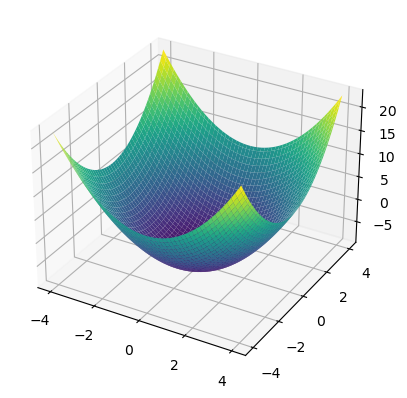

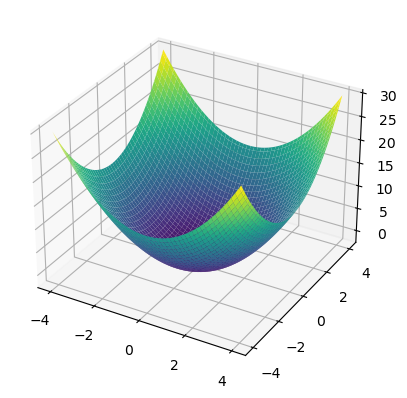

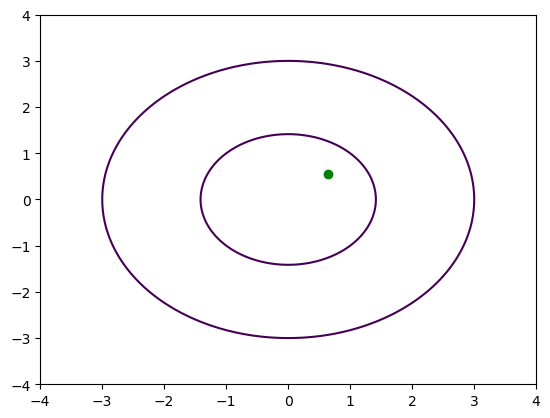

In [128]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z,cmap=plt.cm.viridis)
plt.show()

fig=plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z1, cmap=plt.cm.viridis)
plt.show()

plt.contour(X,Y,Z, levels=[0])
plt.contour(X,Y,Z1,levels=[0])
plt.plot(Xm_2[0],Xm_2[1],'go')

**Sperimentazione Numerica**

Risolvere i seguenti tre sistemi non lineari:

1) 

   2x0-cos(x1)=0

   sin(x0)+2x1=0

2) 

   x0^2+x1^2-9=0

   x0+x1-3=0

3) 

   4x0^2+x_1^2=4

   x0+x1=sin(x0-x1)



Servirsi del metodo grafico per individuare un 
iterato iniziale  $X_0$  nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=0 delle due superfici z1 = f1 (x0 ,x1 ) e z2 = f2(x0, x1 ) e 
definire come iterato iniziale un vettore $X_0$ oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) 
 

In [ ]:
def 